# A1: Three-Layer Neural Network

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1">Requirements</a></span></li><li><span><a href="#Example-Results" data-toc-modified-id="Example-Results-2">Example Results</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3">Discussion</a></span></li></ul></div>

## Requirements

In this assignment, you will start with code from lecture notes 04 and add code to do the following.

* Add another hidden layer, for a total of two hidden layers.  This layer will use a weight matrix named `U`.  Its outputs will be named `Zu` and the outputs of the second hidden layer will be changed to `Zv`.
* Define function `forward` that returns the output of all of the layers in the neural network for all samples in `X`. `X` is assumed to be standardized and have the initial column of constant 1 values.

      def forward(X, U, V, W):
          .
          .
          .
          Y = . . . # output of neural network for all rows in X
          return Zu, Zv, Y
      
* Define function `gradient` that returns the gradients of the mean squared error with respect to each of the three weight matrices. `X` and `T` are assumed to be standardized and `X` has the initial column of 1's.

      def gradient(X, T, Zu, Zv, Y, U, V, W):
          .
          .
          .
          return grad_wrt_U, grad_wrt_V, grad_wrt_W
          
* Define function `train` that returns the resulting values of `U`, `V`, and `W` and the standardization parameters.  Arguments are unstandardized `X` and `T`, the number of units in the two hidden layers, the number of epochs and the learning rate, which is the same value for all layers. This function standardizes `X` and `T`, initializes `U`, `V` and `W` to uniformly distributed random values between -1 and 1, and `U`, `V` and `W` for `n_epochs` times as shown in lecture notes 04.  This function must call `forward`, `gradient` and `addOnes`.

      def train(X, T, n_units_U, n_units_V, n_epochs, rho):
          .
          .
          .
          return U, V, W, X_means, X_stds, T_means, T_stds
          
* Define function `use` that accepts unstandardized `X`, standardization parameters, and weight matrices `U`, `V`, and `W` and returns the unstandardized output.

      def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
          .
          .
          .
          Y = ....
          return Y

## Example Results

## This is where the solution begins

Initialization cell below

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd  # for display and clear_output
import time  # for sleep
import pandas

The below function Adds a coloumn of 1's

In [14]:
def addOnes(X):
    return np.insert(X, 0, 1, axis=1)

Add code cells here to define the functions above.  Once these are correctly defined, the following cells should run and produce similar results as those here.

* Requirement 1 : Define function `forward` that returns the output of all of the layers in the neural network for all samples in `X`. `X` is assumed to be standardized and have the initial column of constant 1 values.

      def forward(X, U, V, W):
          .
          .
          .
          Y = . . . # output of neural network for all rows in X
          return Zu, Zv, Y

In [15]:
def forward(X, U, V, W):
    Zu = np.tanh(X @ U) #1st layer op
    Zu1 = addOnes(Zu)
    Zv = np.tanh(Zu1 @ V) #2nd layer op
    Zv1 = addOnes(Zv)
    Y = Zv1 @ W
    return Zu, Zv, Y

* Requirement 2 : Define function `gradient` that returns the gradients of the mean squared error with respect to each of the three weight matrices. `X` and `T` are assumed to be standardized and `X` has the initial column of 1's.

      def gradient(X, T, Zu, Zv, Y, U, V, W):
          .
          .
          .
          return grad_wrt_U, grad_wrt_V, grad_wrt_W

In [16]:
def gradient(X, T, Zu, Zv, Y, U, V, W):
    Dw = T - Y
    Dv = Dw @ W[1:, :].T * (1 - Zv**2)
    Du = Dv @ V[1:, :].T * (1 - Zu**2)
    Zv1 = addOnes(Zv)
    Zu1 = addOnes(Zu)
    grad_wrt_W = - Zv1.T @ Dw
    grad_wrt_V = - Zu1.T @ Dv
    grad_wrt_U = - X.T @ Du
    return grad_wrt_U, grad_wrt_V, grad_wrt_W

* Requirement 3 : Define function `train` that returns the resulting values of `U`, `V`, and `W` and the standardization parameters.  Arguments are unstandardized `X` and `T`, the number of units in the two hidden layers, the number of epochs and the learning rate, which is the same value for all layers. This function standardizes `X` and `T`, initializes `U`, `V` and `W` to uniformly distributed random values between -1 and 1, and `U`, `V` and `W` for `n_epochs` times as shown in lecture notes 04.  This function must call `forward`, `gradient` and `addOnes`.

      def train(X, T, n_units_U, n_units_V, n_epochs, rho):
          .
          .
          .
          return U, V, W, X_means, X_stds, T_means, T_stds

In [17]:
def train(X, T, nu, nv, n_epochs, rho):
    no = T.shape[1]
    ni = X.shape[1]
    rho = rho / (ni * no)
    # Standardizes X and T
    X_means = X.mean(axis=0)
    X_stds = X.std(axis=0)
    T_means = T.mean(axis=0)
    T_stds = T.std(axis=0)
    XS = (X - X_means) / X_stds
    TS = (T - T_means) / T_stds
    # prepend 1's column in XS
    XS1 = addOnes(XS)
    TS1 = addOnes(TS)
    #Weight matrix
    U = np.random.uniform(-1, 1, size=(1 + ni, nu)) / np.sqrt(XS1.shape[1])
    V = np.random.uniform(-1, 1, size=(1 + nu, nv)) / np.sqrt(nu+1)
    W = np.random.uniform(-1, 1, size=(1 + nv, no)) / np.sqrt(nv+1)
    for epochs in range(n_epochs):
        # Call function for gradient & required Forward function
        Zu, Zv, Y = forward(addOnes(XS), U, V, W)
        grad_wrt_U, grad_wrt_V, grad_wrt_W = gradient(XS1, TS, Zu, Zv, Y, U, V, W)
        # Take step down the gradient
        W = W - rho * grad_wrt_W
        V = V - rho * grad_wrt_V
        U = U - rho * grad_wrt_U
    return U, V, W, X_means, X_stds, T_means, T_stds

* Reqirement 4 : Define function `use` that accepts unstandardized `X`, standardization parameters, and weight matrices `U`, `V`, and `W` and returns the unstandardized output.

      def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
          .
          .
          .
          Y = ....
          return Y

In [18]:
def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
    #standardisation of input data
    XS = (X - X_means) / X_stds
    X1 = addOnes(XS)
    Y1 = addOnes(np.tanh(X1 @ U))
    Y2 = addOnes(np.tanh(Y1 @ V))
    Y3 = Y2 @ W
    Y = Y3 * T_stds + T_means
    return Y

In [19]:
X = (np.arange(40).reshape(-1, 4) - 10) * 0.1
T = np.hstack((X ** 3, np.sin(X)))
U, V, W, X_means, X_stds, T_means, T_stds = train(X, T, 100, 50, 10, 0.01)

In [20]:
Xtrain = np.arange(4).reshape(-1, 1)
Ttrain = Xtrain ** 2

Xtest = Xtrain + 0.5
Ttest = Xtest ** 2

In [21]:
U = np.array([[1, 2, 3], [4, 5, 6]])  # 2 x 3 matrix, for 2 inputs (include constant 1) and 3 units
V = np.array([[-1, 3], [1, 3], [-2, 1], [2, -4]]) # 2 x 3 matrix, for 3 inputs (include constant 1) and 2 units
W = np.array([[-1], [2], [3]])  # 3 x 1 matrix, for 3 inputs (include constant 1) and 1 ounit

In [22]:
X_means = np.mean(Xtrain, axis=0)
X_stds = np.std(Xtrain, axis=0)
Xtrain_st = (Xtrain - X_means) / X_stds

In [23]:
Zu, Zv, Y = forward(addOnes(Xtrain_st), U, V, W)
print('Zu = ', Zu)
print('Zv = ', Zv)
print('Y = ', Y)

Zu =  [[-0.99967774 -0.99983726 -0.99991782]
 [-0.65775956 -0.23177837  0.3065367 ]
 [ 0.99246605  0.99958165  0.99997685]
 [ 0.9999941   0.99999995  1.        ]]
Zv =  [[-9.64016194e-01  9.95062648e-01]
 [-5.23485834e-01 -4.06326878e-01]
 [-6.74345774e-03  9.94823310e-01]
 [-5.79521329e-06  9.95054578e-01]]
Y =  [[ 0.05715556]
 [-3.2659523 ]
 [ 1.97098301]
 [ 1.98515214]]


In [24]:
T_means = np.mean(Ttrain, axis=0)
T_stds = np.std(Ttrain, axis=0)
Ttrain_st = (Ttrain - T_means) / T_stds
grad_wrt_U, grad_wrt_V, grad_wrt_W = gradient(Xtrain_st, Ttrain_st, Zu, Zv, Y, U, V, W)
print('grad_wrt_U = ', grad_wrt_U)
print('grad_wrt_V = ', grad_wrt_V)
print('grad_wrt_W = ', grad_wrt_W)

grad_wrt_U =  [[ 5.83033911 -0.43361979 -7.35611199]]
grad_wrt_V =  [[ 0.92812794 -6.29102685]
 [ 6.74349351  4.24106248]
 [ 5.19130234  1.51895191]
 [ 3.19836999 -1.92147926]]
grad_wrt_W =  [[0.74733841]
 [0.30431595]
 [4.31908649]]


In [25]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
Y

array([[ 3.70004445],
       [-7.93083306],
       [10.39844055],
       [10.44803251]])

Here is another example that just shows the final results of training.

In [26]:
n = 30
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

In [27]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 1000, 0.01)

In [28]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

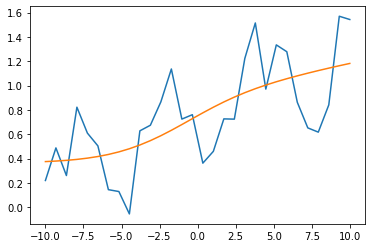

In [29]:
plt.plot(Xtrain, Ttrain)
plt.plot(Xtrain, Y);

Let the above cell data be our base standard with values, 
neurons in U layer = 5;
neurons in V layer = 5;
epochs = 1000;
rho = 0.001;
used for training, in the cells below I have used different values for the variable listed above through trial and error and found the best value possible.

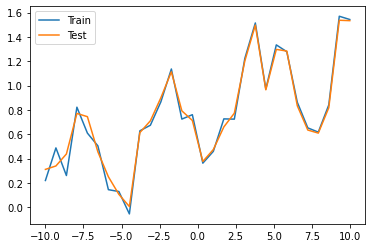

In [30]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 300, 100, 10000, 0.005)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

From the above cell we can say that increasing the number of neurons in the layers does not benefit us much.

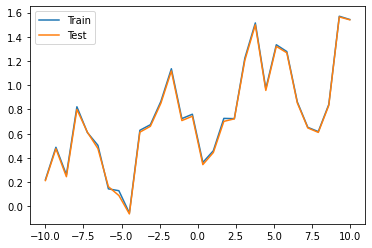

In [31]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 100, 50, 50000, 0.005)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

From the above cell we can say that increasing the number of iterations does 
a better job, even with the decreased number of neurons.

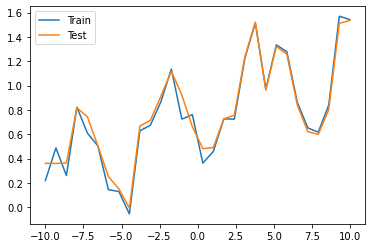

In [32]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 100, 50, 50000, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

From the above cell we can say that with an increase in learning rate, 
our data maps a bit better to the test data.

In [33]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 75, 25, 75000, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

KeyboardInterrupt: 

From the above cell we can say that, number of iterations and 
the learning rate have a much greater effect on our training model than the total number of neurons in our neural network.

In [ ]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 75, 25, 75000, 0.09)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

From the above cell we see that our Neural net model is overfitting, which is not good since 
it is not possible to collect an unbiased sample of data, 
but we can use this to our leverage by reducing 
the number of neurons and the number of iterations and reduce overall computational load.

In [ ]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 50, 25, 50000, 0.1)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

From the above cell we can say that any significant 
increase in the learning rate can be used as a 
counter-weight for a decrease in the number of neurons
and iterations without any significant loss in model accuracy

In [ ]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 30, 15, 40000, 0.6)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

Here I can conclude that the number of neurons in our neural 
net model have a saturation point above which they do not significantly 
contribute to increase model accuracy.

## Discussion

In this markdown cell, describe what difficulties you encountered in completing this assignment. What parts were easy for you and what parts were hard?
Answer :
1. A good learning rate value can help in reducing computational load.
2. Number of neurons in a neural net have a saturation point.
3. Overfitting is not good for a model, but can be used to our leverage.

# Grading

**A1grader.tar is now available.**

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 10 points will be based on your discussion of this assignment.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [ ]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Shetty-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    Zu, Zv, Y = forward(addOnes(X), U, V, W)


--- 20/20 points. Zu, Zv and Y are correct.

Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    Zu = np.array([[0.        , 0.09966799],
                   [0.19737532, 0.37994896],
                   [0.

# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.

In [2]:
import pandas
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data.dropna(axis=0)
print(data)
hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1)
print(X.shape,T.shape)

            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
1226  30/04/2004  20.00.00     4.4       1449.0     501.0      19.5   
1227  30/04/2004  21.00.00     3.1       1363.0     234.0      15.1   
1228  30/04/2004  22.00.00     3.0       1371.0     212.0      14.6   
1229  30/04/2004  23.00.00     3.1       1406.0     275.0      13.7   
1230  01/05/2004  00.00.00     3.5       1425.0     275.0      15.2   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1        

NameError: name 'np' is not defined

In [ ]:
U, V, W, X_means, X_stds, T_means, T_stds = train(X, T, 30, 15, 40000, 0.6)
Y = use(X, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(X, T,'.', label='Train')
plt.plot(X, Y,'o', label='Test')
plt.ylabel('CO')
plt.xlabel('Time in Hours')
plt.legend();